# PROYECTO N°2

### Importación de librerias y carga del dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Cargo el dataset
properati = pd.read_csv("DSp2.csv")

Se decide considerar unicamente la Distrito de "Capital Federal", y además las tres propiedades con mayor cantidad de publicaciones (departamento, PH y casa) con el fin de poder llevar a cabo una adecuada comparación de los modelos, ya que se los evalúa con las mismas condiciones 

In [4]:
#Creo diferentes datasets filtrando el dataset original con las propiedades de mi interes y la zona de CABA.
df1 = properati[(properati.l2 =='Capital Federal') & (properati.property_type == 'Departamento')]
df2 = properati[(properati.l2 =='Capital Federal') & (properati.property_type == 'PH')]
df3 = properati[(properati.l2 =='Capital Federal') & (properati.property_type == 'Casa')]

#Creo un dataset concatentando los dataset individuales 
data = pd.concat([df1, df2,df3])
data.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
11,2019-10-17,2019-10-26,2019-10-17,-34.603683,-58.381557,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,USD,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,Venta
12,2019-10-17,2019-12-19,2019-10-17,-34.630349,-58.417223,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,USD,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,Venta
20,2019-10-17,2019-10-24,2019-10-17,-34.608246,-58.444262,Argentina,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,USD,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,Venta
21,2019-10-17,2019-10-28,2019-10-17,-34.603890,-58.410998,Argentina,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,USD,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento,Venta


In [5]:
# Filtro dataset por currency y operation_type 
data = data[(data.operation_type == 'Venta') & (data.currency == 'USD')]

In [6]:
#Descarto las columnas que no son de mi interes 
data = data.drop(columns=["l1","start_date","end_date","created_on", "description","title","currency","operation_type"])

In [7]:
data.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,-34.603683,-58.381557,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,-34.630349,-58.417223,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,-34.608246,-58.444262,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,-34.603890,-58.410998,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento


In [8]:
#Cambio nombre de las columnas
data.rename({"l2": "district ","l3": "city"}, axis=1, inplace=True)

In [9]:
#Veo cantidad de instancias y cantidad de columnas que tengo
data.shape

(91485, 11)

### Valores faltantes

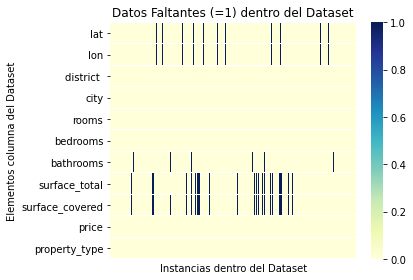

In [10]:
#Gráficamente podemos ver donde estan los datos faltantes dentro del dataset, ayudandosnos a tener una idea de la estructura de los datos
dat = data.isnull()
heat = sns.heatmap(dat.T, cmap = 'YlGnBu', xticklabels = False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()

In [11]:
#Muestro el porcentaje de valores faltantes por columnas:
data.isna().sum()/data.shape[0]*100

lat                 4.956004
lon                 4.971307
district            0.000000
city                0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.373067
surface_total       9.746953
surface_covered    10.094551
price               0.000000
property_type       0.000000
dtype: float64

### Transformación de datos

Se busca trabajar con los valores faltantes rellenandolos con los estadisticos correspondientes y así incluir mayor cantidad de intancias en nuestro modelo

#### Imputación:

In [12]:
# Relleno los valores faltantes (de la variable surface_covered) por el valor medio de su tipo
mean_surface = data[["surface_covered","property_type"]].groupby("property_type").agg(pd.Series.median)
mean_dict = mean_surface.to_dict()['surface_covered']
mean_dict

{'Casa': 179.0, 'Departamento': 60.0, 'PH': 84.0}

In [13]:
data = data.set_index("property_type")
data.surface_covered.fillna(mean_dict, inplace=True)

data.reset_index(inplace=True)

In [1]:
# Relleno los valores faltantes (de la variable surface_total) por el valor medio de su tipo
mean_surface = data[["surface_total","property_type"]].groupby("property_type").agg(pd.Series.median)
mean_dict = mean_surface.to_dict()['surface_total']
mean_dict

NameError: name 'data' is not defined

In [15]:
data = data.set_index("property_type")
data.surface_total.fillna(mean_dict, inplace=True)

data.reset_index(inplace=True)

In [16]:
# Relleno los valores faltantes (de la variable bathrooms) por el valor medio de su tipo

mean_surface = data[["bathrooms","property_type"]].groupby("property_type").agg(pd.Series.median)
mean_dict = mean_surface.to_dict()['bathrooms']
mean_dict

{'Casa': 2.0, 'Departamento': 1.0, 'PH': 1.0}

In [17]:
data = data.set_index("property_type")
data.bathrooms.fillna(mean_dict, inplace=True)

data.reset_index(inplace=True)
data.head()

,property_type,lat,lon,district,city,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Departamento,-34.603683,-58.381557,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0
2,Departamento,-34.630349,-58.417223,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0
3,Departamento,-34.608246,-58.444262,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0
4,Departamento,-34.603890,-58.410998,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0


In [18]:
# Compruebo que no tenga valores faltantes en esas columnas que modifique
data.isna().sum()/data.shape[0]*100

property_type      0.000000
lat                4.956004
lon                4.971307
district           0.000000
city               0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.000000
surface_total      0.000000
surface_covered    0.000000
price              0.000000
dtype: float64

In [19]:
# Remplazo la Latitud y la Longitud por el centro de cada ciudad
lon_city = data[["lon", "city"]].groupby("city").agg(pd.Series.mean)
lat_city = data[["lat", "city"]].groupby("city").agg(pd.Series.mean)
data = data.set_index("city")
data.lon.fillna(lon_city.to_dict()["lon"], inplace=True)
data.lat.fillna(lat_city.to_dict()["lat"], inplace=True)
data = data.reset_index()
data.head()

,city,property_type,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Boedo,Departamento,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0
2,Boedo,Departamento,-34.630349,-58.417223,Capital Federal,2.0,1.0,1.0,50.0,44.0,115000.0
3,Abasto,Departamento,-34.608246,-58.444262,Capital Federal,2.0,1.0,1.0,31.0,31.0,75000.0
4,Abasto,Departamento,-34.603890,-58.410998,Capital Federal,1.0,1.0,1.0,22.0,22.0,48000.0


In [20]:
data.isna().sum()/data.shape[0]*100

city               0.0
property_type      0.0
lat                0.0
lon                0.0
district           0.0
rooms              0.0
bedrooms           0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
dtype: float64

Podemos ver que nuestro nuevo dataset ya no posee valores faltantes haciendo que podamos utilizar mayor cantidad de atributos en nuestro modelo de ML.

#### Eliminación de outlayers:

In [21]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,9.148500e+04
mean,-34.598804,-58.435271,2.964278,1.960278,1.548451,108.884801,92.038509,2.595003e+05
std,0.023796,0.036174,1.314704,1.072946,0.854216,931.828645,738.272456,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613413,-58.458156,2.000000,1.000000,1.000000,51.000000,46.000000,1.200000e+05
50%,-34.598972,-58.432946,3.000000,2.000000,1.000000,66.000000,60.000000,1.750000e+05
75%,-34.584587,-58.408885,4.000000,3.000000,2.000000,105.000000,92.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


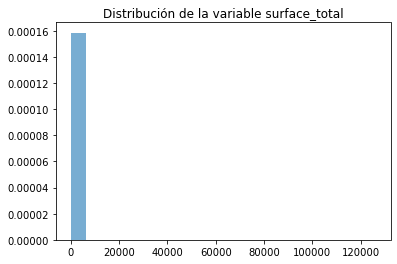

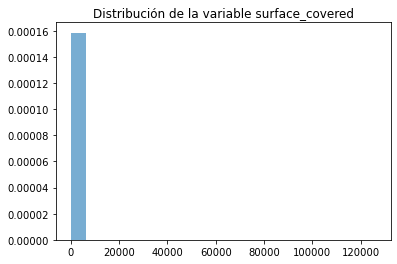

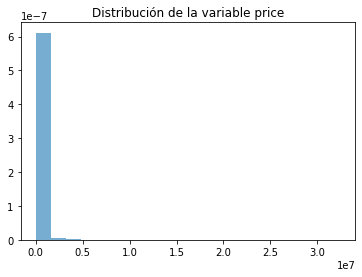

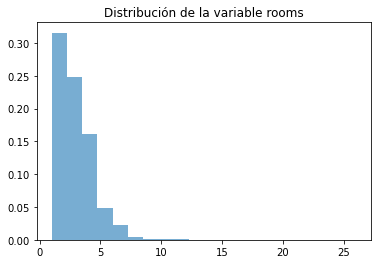

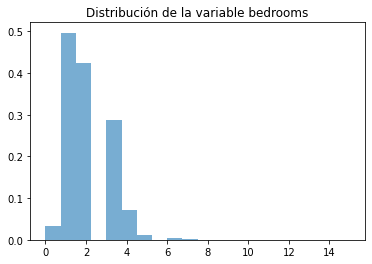

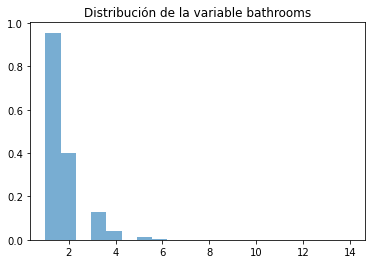

In [22]:
'''Veo como estan distribuidas las variables luego de haber aplicado filtros'''

plt.hist(data.surface_total, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable surface_total')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.surface_covered, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable surface_covered')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.price, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable price')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.rooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable rooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.bedrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bedrooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.bathrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bathrooms')
plt.show()

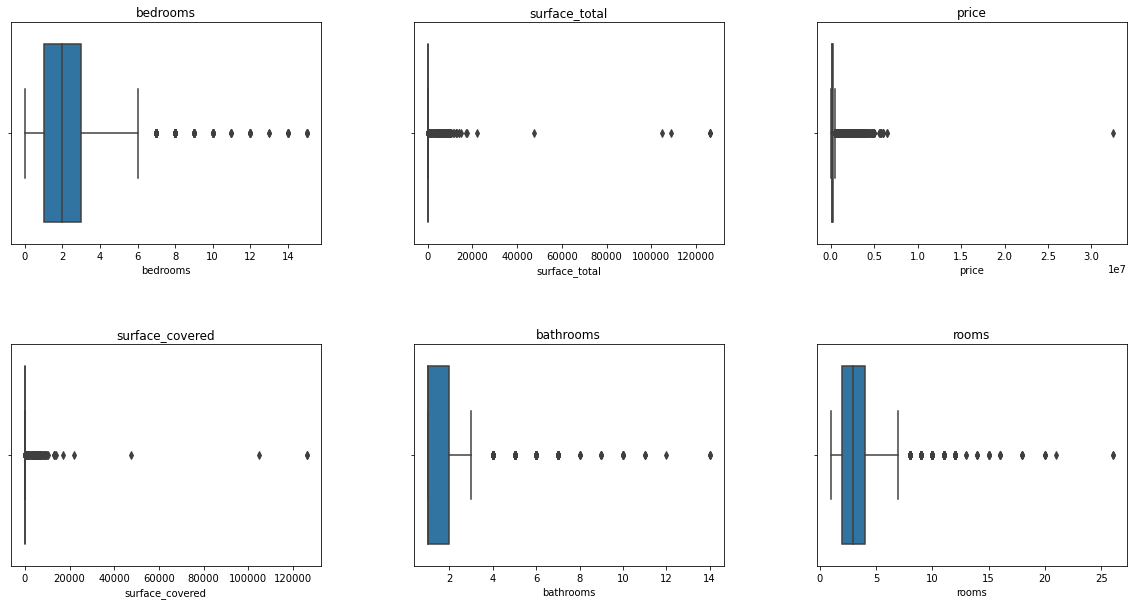

In [23]:
'''Visualizamos Dataset sin aplicar filtros'''
plt.figure(figsize = (20,10))
plt.subplots_adjust(wspace = 0.3,hspace = 0.45)


plt.subplot(2,3,1)
sns.boxplot(data['bedrooms']);
plt.title('bedrooms');

plt.subplot(2,3,2)
sns.boxplot(data['surface_total']);
plt.title('surface_total');

plt.subplot(2,3,3)
sns.boxplot(data['price']);
plt.title('price');

plt.subplot(2,3,4)
sns.boxplot(data['surface_covered']);
plt.title('surface_covered');

plt.subplot(2,3,5)
sns.boxplot(data['bathrooms']);
plt.title('bathrooms');

plt.subplot(2,3,6)
sns.boxplot(data['rooms']);
plt.title('rooms');

plt.show()

In [24]:
data = data[( data.surface_covered <= data.surface_total)]

In [25]:
data = data[(data.bedrooms>= 1)]

In [26]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,88222.000000,88222.000000,88222.000000,88222.000000,88222.000000,88222.000000,88222.000000,8.822200e+04
mean,-34.598595,-58.435120,3.010462,2.008207,1.561901,110.353291,90.409705,2.640670e+05
std,0.023689,0.036040,1.280726,1.034559,0.858108,948.763752,738.989767,3.256988e+05
min,-34.696419,-58.530468,1.000000,1.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,-34.612883,-58.457666,2.000000,1.000000,1.000000,51.000000,46.000000,1.250000e+05
50%,-34.598730,-58.432913,3.000000,2.000000,1.000000,68.000000,60.000000,1.800000e+05
75%,-34.584544,-58.409187,4.000000,3.000000,2.000000,107.000000,93.000000,2.800000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


* Método 3 sigmas:

In [27]:
df_limpio = data.copy()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
escalador = StandardScaler()
escalador.fit(df_limpio[["bedrooms","bathrooms","rooms"]])

StandardScaler()

In [30]:
df_limpio[["bedrooms","bathrooms","rooms"]] = escalador.transform(df_limpio[["bedrooms","bathrooms","rooms"]])

In [31]:
o_beedrooms = df_limpio[(df_limpio.bedrooms<-3) | (df_limpio.bedrooms>3)]
o_bathrooms = df_limpio[(df_limpio.bathrooms<-3) | (df_limpio.bathrooms>3)]
o_rooms     = df_limpio[(df_limpio.rooms<-3) | (df_limpio.rooms>3)]


outlayers = pd.concat([o_beedrooms,o_bathrooms,o_rooms])
outlayers.head()

,city,property_type,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,-34.605880,-58.384949,Capital Federal,3.115077,4.825071,0.510544,140.0,140.0,153000.0
878,Boedo,Departamento,-34.630956,-58.415223,Capital Federal,3.115077,3.858470,0.510544,250.0,224.0,235000.0
2146,Balvanera,Departamento,-34.603284,-58.395004,Capital Federal,3.115077,4.825071,-0.654817,90.0,90.0,150000.0
2148,Recoleta,Departamento,-34.595801,-58.394750,Capital Federal,5.457511,4.825071,4.006628,168.0,168.0,370000.0
2553,Retiro,Departamento,-34.596551,-58.379841,Capital Federal,3.115077,3.858470,1.675905,170.0,170.0,380000.0


In [32]:
df_limpio.drop(outlayers.index ,axis=0, inplace=True)

In [33]:
df_limpio[["bedrooms","bathrooms","rooms"]] = escalador.inverse_transform(df_limpio[["bedrooms","bathrooms","rooms"]])

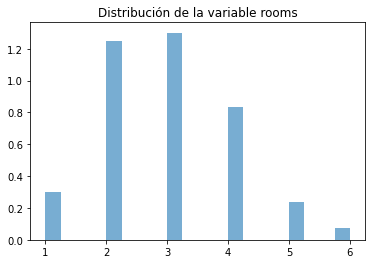

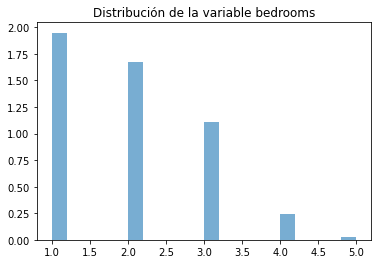

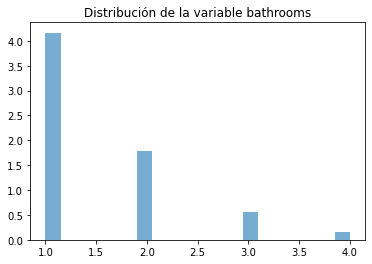

In [34]:
'''Veo como estan distribuidas las variables luego de haber aplicado filtros'''

#'---------------------------------------------------------------'
plt.hist(df_limpio.rooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable rooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(df_limpio.bedrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bedrooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(df_limpio.bathrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bathrooms')
plt.show()

In [35]:
data = df_limpio.copy()

* Filtrado por cuartiles

In [36]:
#Variable surface_total
p_1 = data.surface_total.quantile(0.1)
p_2 = data.surface_total.quantile(0.95)
f1 = data[data.surface_total.gt(p_1) & data.surface_total.lt(p_2)]

In [37]:
#Variable price
p_1 = f1.price.quantile(0.1)
p_2 = f1.price.quantile(0.95)
f2 = f1[f1.price.gt(p_1) & f1.price.lt(p_2)]

In [38]:
#Variable covered
p_1 = f2.surface_covered.quantile(0.1)
p_2 = f2.surface_covered.quantile(0.95)
f3 = f2[f2.surface_covered.gt(p_1) & f2.surface_covered.lt(p_2)]

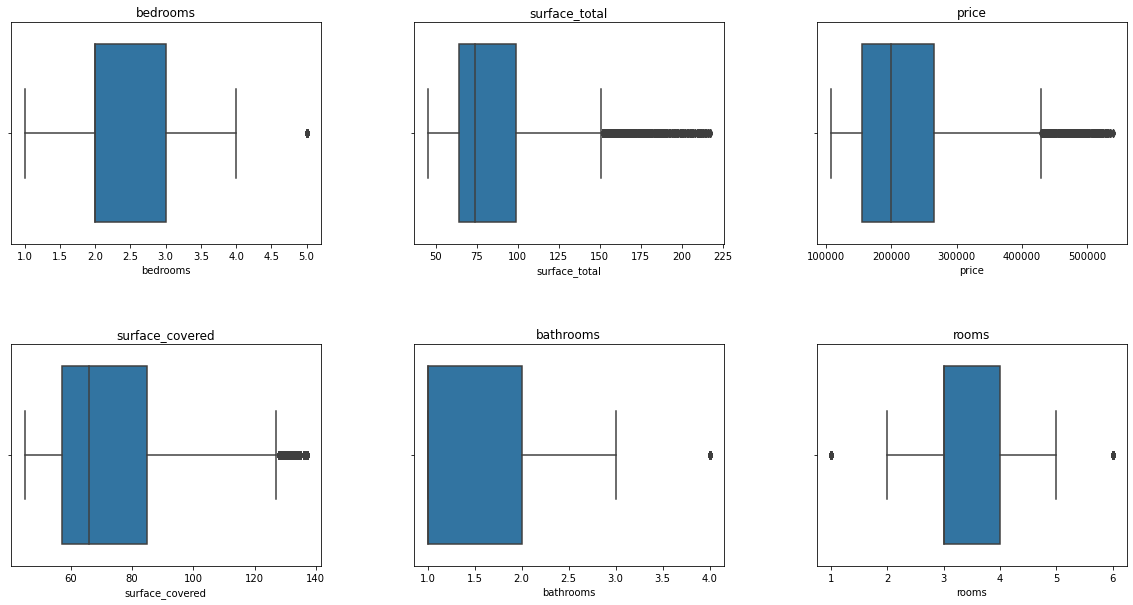

In [39]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(wspace = 0.3,hspace = 0.45)

plt.subplot(2,3,1)
sns.boxplot(f3['bedrooms']);
plt.title('bedrooms');

plt.subplot(2,3,2)
sns.boxplot(f3['surface_total']);
plt.title('surface_total');

plt.subplot(2,3,3)
sns.boxplot(f3['price']);
plt.title('price');

plt.subplot(2,3,4)
sns.boxplot(f3['surface_covered']);
plt.title('surface_covered');

plt.subplot(2,3,5)
sns.boxplot(f3['bathrooms']);
plt.title('bathrooms');

plt.subplot(2,3,6)
sns.boxplot(f3['rooms']);
plt.title('rooms');

plt.show()

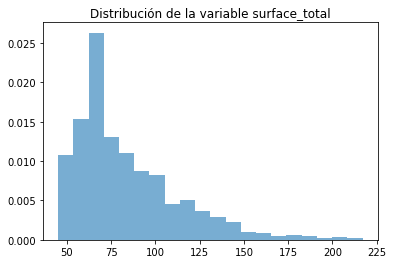

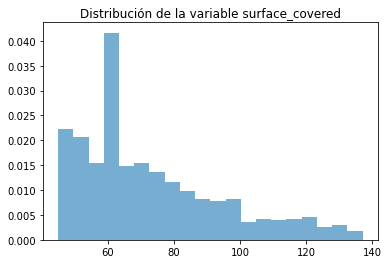

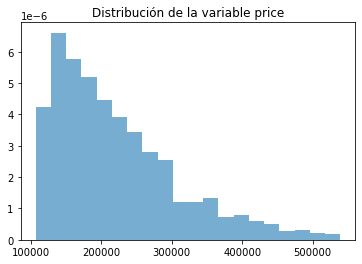

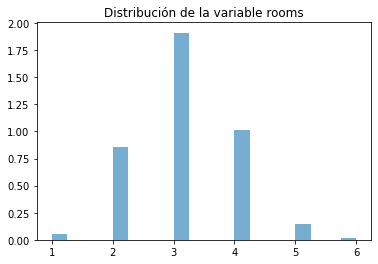

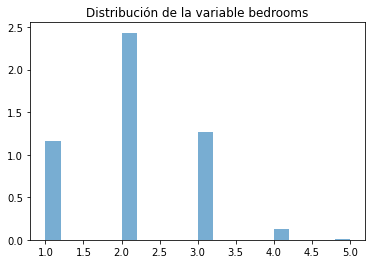

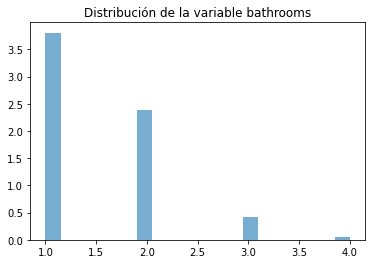

In [40]:
'''Veo como estan distribuidas las variables luego de haber aplicado filtros'''

plt.hist(f3.surface_total, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable surface_total')
plt.show()
#'---------------------------------------------------------------'
plt.hist(f3.surface_covered, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable surface_covered')
plt.show()
#'---------------------------------------------------------------'
plt.hist(f3.price, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable price')
plt.show()
#'---------------------------------------------------------------'
plt.hist(f3.rooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable rooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(f3.bedrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bedrooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(f3.bathrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bathrooms')
plt.show()

In [41]:
data = f3
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,51178.000000,51178.000000,51178.000000,51178.000000,51178.000000,51178.000000,51178.000000,51178.000000
mean,-34.597525,-58.437189,3.100258,2.081480,1.510551,83.532025,72.810583,221221.082516
std,0.022980,0.034610,0.839466,0.775202,0.655963,29.484698,21.931827,87122.283249
min,-34.694523,-58.530467,1.000000,1.000000,1.000000,45.000000,45.000000,107111.000000
25%,-34.611552,-58.458871,3.000000,2.000000,1.000000,64.000000,57.000000,155000.000000
50%,-34.598274,-58.434257,3.000000,2.000000,1.000000,74.000000,66.000000,199500.000000
75%,-34.583073,-58.413845,4.000000,3.000000,2.000000,99.000000,85.000000,265000.000000
max,-34.535818,-58.353930,6.000000,5.000000,4.000000,217.000000,137.000000,539007.000000


In [42]:
data.shape

(51178, 11)

In [43]:
tipo = data['property_type'].copy() #Lo uso para el punto 'C'

#### Encoding de variables

Buscamos transformar las variables categorias a variables numéricas y así poder incorporarlas como atributos al modelo de ML e intentar desminur el error en la predicción

* One Hot Encoding

In [44]:
data = pd.get_dummies(data,columns=["property_type"])

In [45]:
data.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,Boedo,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0
7,Flores,-34.636661,-58.471170,Capital Federal,2.0,1.0,1.0,58.0,48.0,154000.0,0,1,0
8,Flores,-34.633914,-58.470013,Capital Federal,2.0,1.0,1.0,50.0,48.0,132000.0,0,1,0
16,Palermo,-34.590031,-58.423771,Capital Federal,2.0,1.0,1.0,52.0,48.0,188000.0,0,1,0
17,Palermo,-34.585304,-58.422915,Capital Federal,2.0,1.0,2.0,81.0,76.0,410000.0,0,1,0


* Utilización de diccionario

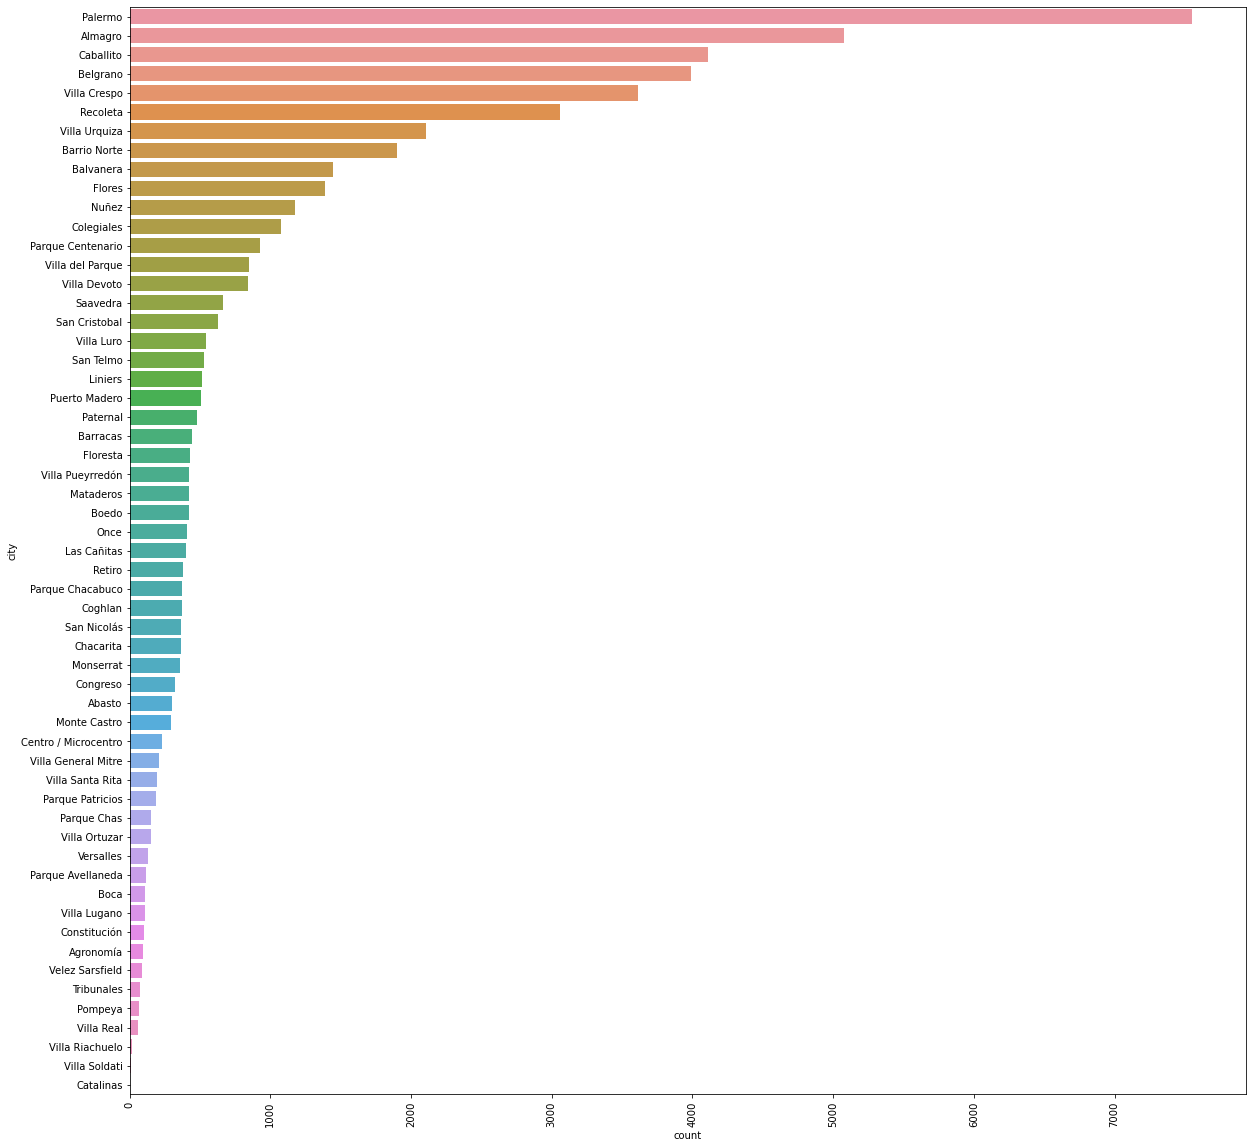

In [46]:
#Veo las localidades de dichas propiedades
plt.figure(figsize=(20,20))
sns.countplot(data = data, y = "city", order = data['city'].value_counts().index)
plt.xticks(rotation=90);

In [47]:
tipos = pd.Series(data['city'])
tipos = tipos.value_counts()

tipos = pd.DataFrame(tipos).reset_index()
tipos.rename({"index": "city","city": "cantidad"}, axis=1, inplace=True)
tipos.head()

,city,cantidad
0,Palermo,7553
1,Almagro,5074
2,Caballito,4114
3,Belgrano,3991
4,Villa Crespo,3613


In [48]:
tipos = tipos.set_index('city')
tipos.head()

,cantidad
city,
Palermo,7553
Almagro,5074
Caballito,4114
Belgrano,3991
Villa Crespo,3613


In [49]:
dicc = tipos.to_dict()
dicc = dicc['cantidad']
dicc

{'Palermo': 7553,
 'Almagro': 5074,
 'Caballito': 4114,
 'Belgrano': 3991,
 'Villa Crespo': 3613,
 'Recoleta': 3056,
 'Villa Urquiza': 2108,
 'Barrio Norte': 1900,
 'Balvanera': 1445,
 'Flores': 1392,
 'Nuñez': 1176,
 'Colegiales': 1078,
 'Parque Centenario': 925,
 'Villa del Parque': 852,
 'Villa Devoto': 845,
 'Saavedra': 664,
 'San Cristobal': 625,
 'Villa Luro': 543,
 'San Telmo': 531,
 'Liniers': 514,
 'Puerto Madero': 507,
 'Paternal': 480,
 'Barracas': 447,
 'Floresta': 430,
 'Villa Pueyrredón': 422,
 'Mataderos': 419,
 'Boedo': 419,
 'Once': 410,
 'Las Cañitas': 401,
 'Retiro': 380,
 'Parque Chacabuco': 375,
 'Coghlan': 373,
 'San Nicolás': 363,
 'Chacarita': 362,
 'Monserrat': 356,
 'Congreso': 325,
 'Abasto': 301,
 'Monte Castro': 295,
 'Centro / Microcentro': 231,
 'Villa General Mitre': 210,
 'Villa Santa Rita': 196,
 'Parque Patricios': 190,
 'Parque Chas': 152,
 'Villa Ortuzar': 149,
 'Versalles': 128,
 'Parque Avellaneda': 120,
 'Boca': 112,
 'Villa Lugano': 109,
 'Const

In [50]:
# Creo diccionario a mano, no lo utilizo!!

# dicc2 = {'Palermo':0, 'Almagro':1, 'Belgrano':2, 'Caballito':3, 'Villa Crespo':4,
#        'Recoleta':5, 'Villa Urquiza':6, 'Barrio Norte':7, 'Flores':8, 'Balvanera':9,
#        'Nuñez':10, 'Colegiales':11, 'Puerto Madero':12, 'Parque Centenario':13,
#        'Villa Devoto':14, 'Villa del Parque':15, 'Saavedra':16, 'San Cristobal':17,
#        'Villa Luro':18, 'Liniers':19, 'San Telmo':20, 'Paternal':21, 'Barracas':22,
#        'Las Cañitas':23, 'Villa Pueyrredón':24, 'Mataderos':25, 'Boedo':26,
#        'Floresta':27, 'Parque Chacabuco':28, 'Retiro':29, 'Coghlan':30, 'Once':31,
#        'Chacarita':32, 'San Nicolás':33, 'Monserrat':34, 'Monte Castro':34,
#        'Congreso':35, 'Abasto':36, 'Centro / Microcentro':37, 'Parque Patricios':38,
#        'Villa General Mitre':39, 'Villa Santa Rita':40, 'Parque Chas':41,
#        'Villa Ortuzar':42, 'Versalles':43, 'Parque Avellaneda':44, 'Villa Lugano':45,
#        'Boca':46, 'Velez Sarsfield':47, 'Agronomía':48, 'Constitución':49, 'Pompeya':50,
#        'Tribunales':51, 'Villa Real':52, 'Villa Soldati':53, 'Villa Riachuelo':54,
#        'Catalinas':55}

In [51]:
data["city"] = data.city.map(dicc)
data.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,419,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0
7,1392,-34.636661,-58.471170,Capital Federal,2.0,1.0,1.0,58.0,48.0,154000.0,0,1,0
8,1392,-34.633914,-58.470013,Capital Federal,2.0,1.0,1.0,50.0,48.0,132000.0,0,1,0
16,7553,-34.590031,-58.423771,Capital Federal,2.0,1.0,1.0,52.0,48.0,188000.0,0,1,0
17,7553,-34.585304,-58.422915,Capital Federal,2.0,1.0,2.0,81.0,76.0,410000.0,0,1,0


### Escalado / Normalización de los datos

In [52]:
data_reg = data.copy()

In [53]:
data_reg.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,419,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0
7,1392,-34.636661,-58.471170,Capital Federal,2.0,1.0,1.0,58.0,48.0,154000.0,0,1,0
8,1392,-34.633914,-58.470013,Capital Federal,2.0,1.0,1.0,50.0,48.0,132000.0,0,1,0
16,7553,-34.590031,-58.423771,Capital Federal,2.0,1.0,1.0,52.0,48.0,188000.0,0,1,0
17,7553,-34.585304,-58.422915,Capital Federal,2.0,1.0,2.0,81.0,76.0,410000.0,0,1,0


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
escalador = StandardScaler()
escalador.fit(data_reg[['city','rooms', 'bedrooms', 'bathrooms','surface_total', 'surface_covered']])

StandardScaler()

In [56]:
data_reg[['city','rooms', 'bedrooms', 'bathrooms','surface_total', 'surface_covered']] = escalador.transform(data_reg[['city','rooms', 'bedrooms', 'bathrooms','surface_total', 'surface_covered']])

In [57]:
data_reg.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,-1.115192,-34.603683,-58.381557,Capital Federal,-1.310677,-1.395108,-0.778331,-0.526788,-0.629711,149000.0,0,1,0
7,-0.713742,-34.636661,-58.471170,Capital Federal,-1.310677,-1.395108,-0.778331,-0.865950,-1.131270,154000.0,0,1,0
8,-0.713742,-34.633914,-58.470013,Capital Federal,-1.310677,-1.395108,-0.778331,-1.137280,-1.131270,132000.0,0,1,0
16,1.828220,-34.590031,-58.423771,Capital Federal,-1.310677,-1.395108,-0.778331,-1.069447,-1.131270,188000.0,0,1,0
17,1.828220,-34.585304,-58.422915,Capital Federal,-1.310677,-1.395108,0.746160,-0.085877,0.145426,410000.0,0,1,0


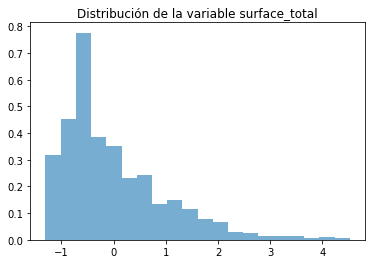

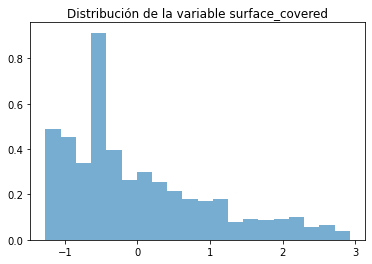

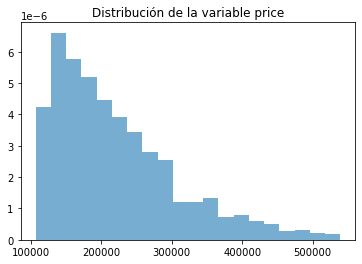

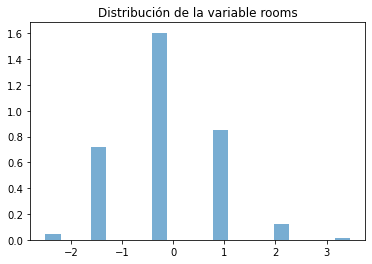

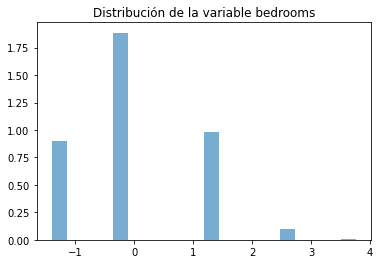

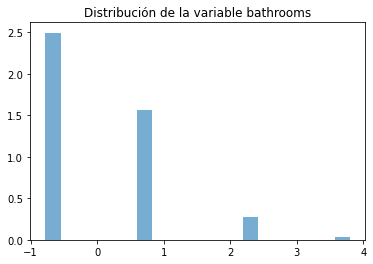

In [58]:
plt.hist(data_reg.surface_total, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable surface_total')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data_reg.surface_covered, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable surface_covered')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data_reg.price, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable price')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data_reg.rooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable rooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data_reg.bedrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bedrooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data_reg.bathrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bathrooms')
plt.show()

Como la distribución de las variables normalizadas es igual a las variables del dataset sin regularizar, podemos afirmar que esta correctamente realizada la normalización

### Machine Learning - sin optimizar hiperparámetros

In [ ]:
data = data_reg.copy()

In [ ]:
data.head()

In [ ]:
#Definimos el targuet y los atributos

X = data[["city","lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","property_type_Casa","property_type_Departamento","property_type_PH"]]
y = data['price']

In [ ]:
#Separamos el set de entrenamiento

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modelos básicos:

#### Regresión Lineal / Árbol de desición / vecinos más cercanos

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=4,random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=50)

linear_model.fit(X_train, y_train);
tree_regressor.fit(X_train, y_train);
knn_regressor.fit(X_train, y_train);

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.xticks(rotation=60);
    plt.show()

Como se puede observar en el error cuadratico medio de cada modelo se obtuvo una mejora considerable en compararción a los modelos creados para el primer proyecto, esto se debe a la correcta manipulación de datos y al agregar atributos de mucha importancia al momento de llevar a cabo una predicción, como por ejemplo la latitud y la longitud de las propiedades.
También, esta mejora de rendimiento se lo debe a el filtrado de los datos reduciendo el número de outlayers que perjudicaban al momento de realizar la predicción.
En el caso del árbol de desición es un modelo que a pesar de obtener un buen desempeño al momento de predecir, no es apropiado utilizarlo ya que tiene los valores muy dispersos, como se puede observar en la prafica y_pred(test) vs y_test.

### Validación Cruzada - Sin optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
tree = DecisionTreeRegressor(max_depth=4,random_state=42)
tree_scores = np.sqrt(abs(cross_val_score(tree, X, y,scoring = 'neg_mean_squared_error', cv=6)))

knn = KNeighborsRegressor(n_neighbors=3)
knn_scores = np.sqrt(abs(cross_val_score(knn, X, y,scoring = 'neg_mean_squared_error', cv=6)))

lineal_model = LinearRegression()
lineal_model_scores = np.sqrt(abs(cross_val_score(linear_model, X, y,scoring = 'neg_mean_squared_error', cv=6)))

In [ ]:
print(tree_scores.mean(), knn_scores.mean(), lineal_model_scores.mean())
print("RMSE para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("RMSE para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))
print("RMSE para Linear-Regression: %0.2f (+/- %0.2f)" % (lineal_model_scores.mean(), lineal_model_scores.std() * 2))

### Machine Learning - Optimizando hiperparámetros

#### Optimizando KNN
##### Modificamos la cantidad de vecinos que considera el modelo

In [ ]:
lista_train = []
lista_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:

    clf = KNeighborsRegressor(n_neighbors=k)
    
    clf.fit(X_train,y_train)

    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(train_rmse)
    lista_test.append(test_rmse)

In [ ]:
plt.plot(k_vecinos,lista_train,'o-',label='train' );
plt.plot(k_vecinos,lista_test,'o-',label='test');
plt.legend();
plt.xlabel('Número de Vecinos');
plt.ylabel('Exactitud');

Como podemos visualizar un valor de K = 20, sería un buen valor de vecinos para el modelo. Como sabemos con ese valor no estamos con under/overfitting.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=20)

knn_regressor.fit(X_train, y_train);

from sklearn.metrics import mean_squared_error
import seaborn as sns

modelos = ['Vecinos más cercanos']

for i, model in enumerate([knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

#### Optimizando Árbol
##### Modificamos la profundidad del árbol

In [ ]:
lista_train = []
lista_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]
 
for max_depth in max_depths:

    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)

    clf.fit(X_train,y_train)

    y_train_pred = clf.predict(X_train)
    train_rmse =  np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(train_rmse)
    lista_test.append(test_rmse)

In [ ]:
plt.plot(max_depths,lista_train,'o-',label='train' );
plt.plot(max_depths,lista_test,'o-',label='test');
plt.legend();
plt.xlabel('Profundidad del árbol');
plt.ylabel('Exactitud');

Como podemos ver en la grafica anterior un valor de 6 seria un buen hiperparametro para nuestro modelo de arbol de decisión, como sabemos con ese valor no estamos con under/overfitting.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=6,random_state=42)

tree_regressor.fit(X_train, y_train);

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión']

for i, model in enumerate([tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Validación Cruzada - Con optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
tree = DecisionTreeRegressor(max_depth=6,random_state=42)
tree_scores = np.sqrt(abs(cross_val_score(tree, X, y,scoring = 'neg_mean_squared_error', cv=6)))

knn = KNeighborsRegressor(n_neighbors=20)
knn_scores = np.sqrt(abs(cross_val_score(knn, X, y,scoring = 'neg_mean_squared_error', cv=6)))

In [75]:
print(tree_scores.mean(), knn_scores.mean())
print("RMSE para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("RMSE para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

54539.141478438694 54036.007785461734
RMSE para Tree: 54539.14 (+/- 8115.45)
RMSE para KNN: 54036.01 (+/- 14564.17)


Como podemos observar, comparando la validación cruzada del modelo optimizado con el modelo sin optimizar, se logró reducir la raiz del error cuadrático medio.
Además podemos afirmar que los modelos utilizados son correctos ya que estos presentan una buena performance, por lo que nuentros modelos entrenados se independizan de los datos de entrenamiento y de prueba.

### Modelos avanzados - Parte B

A pesar de obtener grandes mejorias en los modelos básicos de Machine Learning, estos todavía siguen presentando grandes errores de Tain y Test, lo que podemos afirmar que los modelos tienen Sesgo y Varianza. Por lo tanto, procedemos a utilizar modelos avanzados buscando reducir aún más el error que poseen los modelos al momento de llevar a cabo la predicción.

#### Random forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
data_ML = data_reg.copy()

In [78]:
X_rf = data_ML[["city","lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","property_type_Casa","property_type_Departamento","property_type_PH"]]
y_rf = data_ML['price']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.25, random_state=42)

##### Sin optimizar

In [80]:
forest = RandomForestRegressor(n_estimators = 100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
forest.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, oob_score=True,
                      random_state=42)

In [81]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

Random forest
Raíz del error cuadrático medio en Train: 13276.713432192095
Raíz del error cuadrático medio en Test: 30678.60339000837


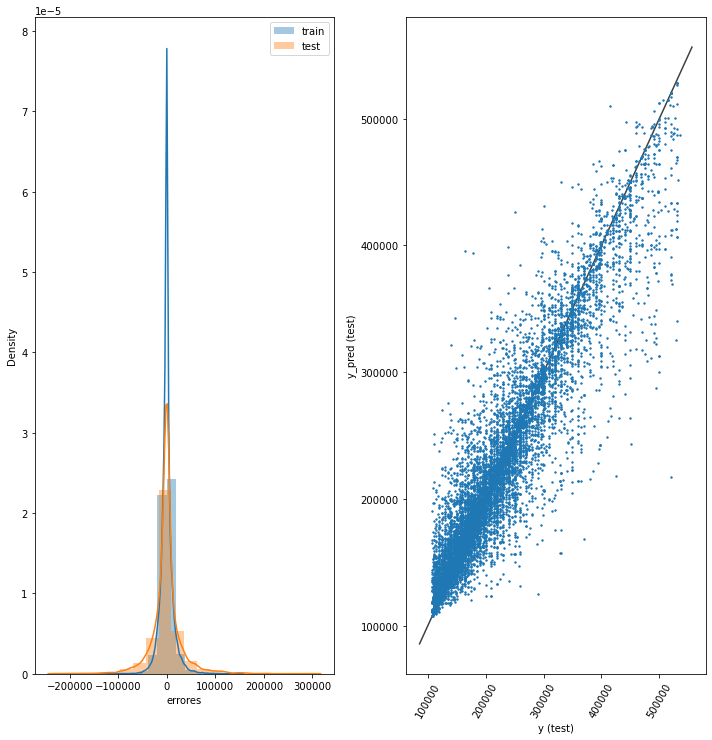

In [82]:
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print('Random forest')
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.xticks(rotation=60);
    plt.show()

In [83]:
forest.oob_score_

0.8703354096076381

##### Random forest optimizado

* Importancia de las caracteristicas

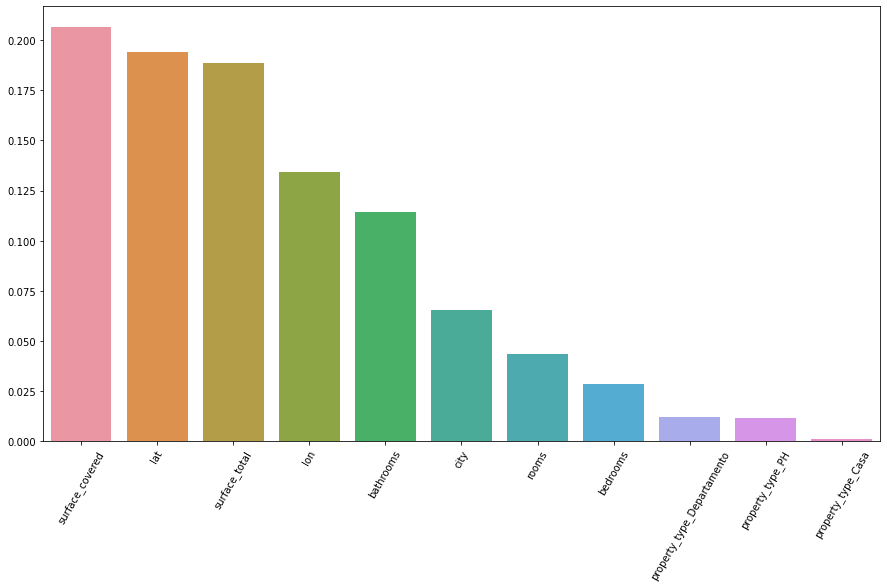

In [84]:
importances = forest.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

Como se esperaba las variables de geolocalización y las de superficies son las mas importantes al momento de llevar a cabo las predicciones del precio de las propiedades.

##### Random Forest optimizado (RandomSearch y GridSearch)

In [85]:
forest = RandomForestRegressor()
params_forest = { 'n_estimators': range(50,325,25),'max_depth' : range(1,20,1),'min_samples_split':range(2,10),'min_samples_leaf':range(1,5),'max_features':['auto','sqrt','log2'],'max_samples':[None,100,1000,5000,10000],'criterion' :['mse'],'random_state':[42]}

In [86]:
'''Se decide trabajar con Random Search por la velocidad de optimización, ejecutandolo varias veces y para así limitar el los hiperparametros del GridSearch'''
# from sklearn.model_selection import RandomizedSearchCV

# model_RF = RandomizedSearchCV(forest, param_distributions = params_forest, cv=4, n_jobs=-1)
# model_RF.fit(X_train,y_train)

'''Gracias al GridSearch pudimos encontrar la zona donde se encuentra la mejor optimizacion del modelo y con esos resultados acotar el rango de los hiperparametros
   y por ende el tiempo de procesamiento del GridSearch'''

from sklearn.model_selection import GridSearchCV

params_forest_gs = { 'n_estimators': range(100,160,20),'max_depth' : range(12,16,1),'min_samples_split':range(2,4),'min_samples_leaf':range(2,4),'max_features':['auto'],'max_samples':[None,100],'criterion' :['mse'],'random_state':[42]}

model_RF = GridSearchCV(forest,param_grid = params_forest_gs, cv=4)
model_RF.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(12, 16),
                         'max_features': ['auto'], 'max_samples': [None, 100],
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(2, 4),
                         'n_estimators': range(100, 160, 20),
                         'random_state': [42]})

In [87]:
print("Mejores parametros: "+str(model_RF.best_params_))
print("Mejor Score: "+str(model_RF.best_score_)+'\n')

scores = pd.DataFrame(model_RF.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_samples': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140, 'random_state': 42}
Mejor Score: 0.833133751192074



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
74,8.335772,0.392567,0.192537,0.012135,mse,15,auto,None,2,2,140,42,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",0.834458,0.832862,0.831242,0.833973,0.833134,0.001236,1
77,9.570491,0.495121,0.228781,0.030382,mse,15,auto,None,2,3,140,42,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",0.834458,0.832862,0.831242,0.833973,0.833134,0.001236,1
76,8.065709,0.505171,0.172300,0.018832,mse,15,auto,None,2,3,120,42,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",0.834404,0.832597,0.830900,0.833684,0.832896,0.001320,3
73,6.984930,0.121845,0.162474,0.008135,mse,15,auto,None,2,2,120,42,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",0.834404,0.832597,0.830900,0.833684,0.832896,0.001320,3
75,6.476406,0.592172,0.167124,0.041585,mse,15,auto,None,2,3,100,42,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",0.834544,0.832204,0.830697,0.833715,0.832790,0.001471,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.224667,0.009552,0.093496,0.015838,mse,13,auto,100,3,2,140,42,"{'criterion': 'mse', 'max_depth': 13, 'max_fea...",0.579712,0.579007,0.574204,0.579096,0.578005,0.002211,89
71,0.240388,0.019084,0.098834,0.018245,mse,14,auto,100,3,3,140,42,"{'criterion': 'mse', 'max_depth': 14, 'max_fea...",0.579712,0.579007,0.574204,0.579096,0.578005,0.002211,89
95,0.151587,0.003772,0.064842,0.000706,mse,15,auto,100,3,3,140,42,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",0.579712,0.579007,0.574204,0.579096,0.578005,0.002211,89
23,0.254016,0.005151,0.105363,0.001632,mse,12,auto,100,3,3,140,42,"{'criterion': 'mse', 'max_depth': 12, 'max_fea...",0.579712,0.579004,0.574204,0.579096,0.578004,0.002211,95


In [88]:
model_RF.predict(X_test)

array([229053.6580447 , 163934.01256284, 234783.87889623, ...,
       411400.62614084, 181002.98582611, 182981.02772491])

In [89]:
model_RF.score(X_test,y_test)

0.847732497859599

RMSE en Train es: 24211.83469504106
RMSE en Test es: 33764.25689698795


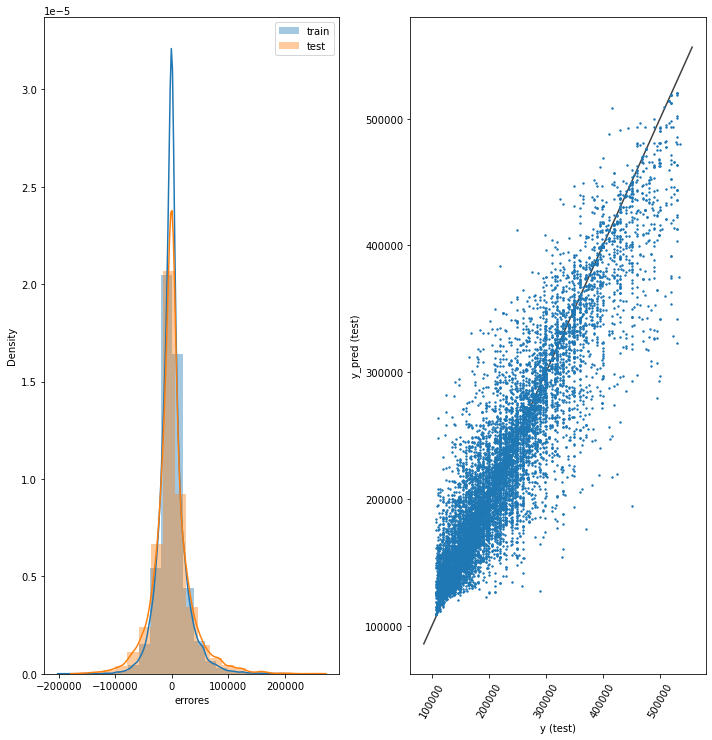

In [90]:
y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test)

rmse_train_RF = np.sqrt(mean_squared_error(y_train, y_train_pred_RF))
rmse_test_RF = np.sqrt(mean_squared_error(y_test, y_test_pred_RF))

print("RMSE en Train es:",rmse_train_RF)
print("RMSE en Test es:",rmse_test_RF)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_RF, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_RF, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_RF, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

##### Validación Cruzada - Random Forest optimizado (RandomSearch y GridSearch)

In [91]:
forest = RandomForestRegressor(n_estimators = 140, min_samples_split = 2, min_samples_leaf = 2, max_samples = None, max_features = 'auto', max_depth = 15, criterion = 'mse', random_state = 42)

forest_scores = np.sqrt(abs(cross_val_score(forest, X_rf, y_rf,scoring = 'neg_mean_squared_error', cv=4)))

In [92]:
print(forest_scores.mean())
print("RMSE para Random Forest: %0.2f (+/- %0.2f)" % (forest_scores.mean(), forest_scores.std() * 2))

39292.67899452373
RMSE para Random Forest: 39292.68 (+/- 10917.53)


Como podemos observar con el modelo de Random Forest se obtuvieron muy buenos resultados, presentando bajos errores para el Train y Test comparandolos con los modelos del primer proyecto y con los modelos de optimización manual.
Pero como podemos observar nuestro modelo posee un bajo sesgo y una alta varianza debido a la diferencia que presenta en el train y test, por lo que podemos afirmar que nuestro modelo esta sobreajustado. Pocedemos a bajarle la complejidad del mismo y analizamos los resultados.

In [93]:
forest = RandomForestRegressor(n_estimators = 130, min_samples_split = 2, min_samples_leaf = 2, max_samples = None, max_features = 'auto', max_depth = 12, criterion = 'mse', random_state = 42)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=130,
                      random_state=42)

In [94]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

Random forest
Raíz del error cuadrático medio en Train: 32143.762164653668
Raíz del error cuadrático medio en Test: 37804.76905791509


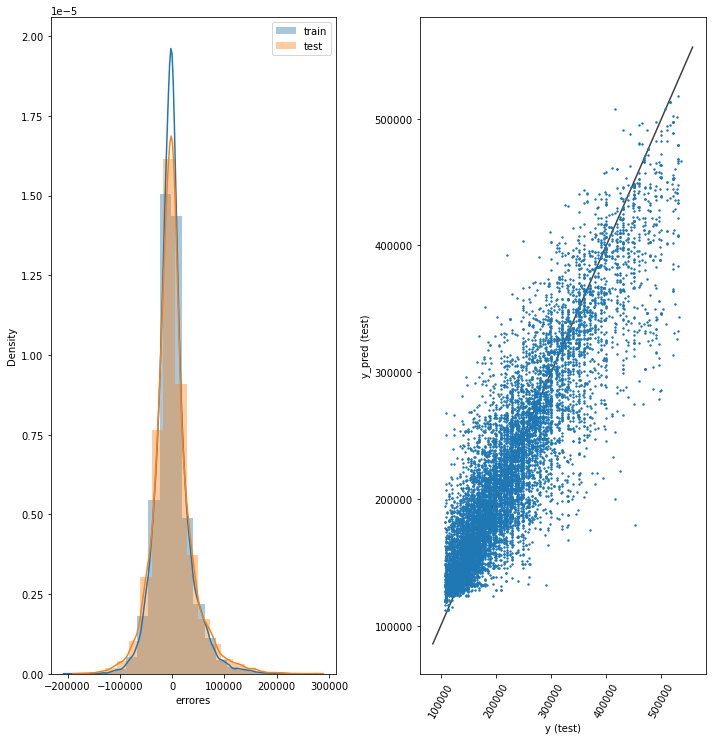

In [95]:
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print('Random forest')
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.xticks(rotation=60);
    plt.show()

Bajando la complejidad del modelo pudismos disminuir la varianza a pesar de que nuestro error aumenta, pero ahora nos aseguramos de que el modelo no esta sobreajustado

####  XGBoost

In [96]:
import xgboost as xgb
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE en Train es: 32017.400808415907
RMSE en Test es: 37448.142884118344


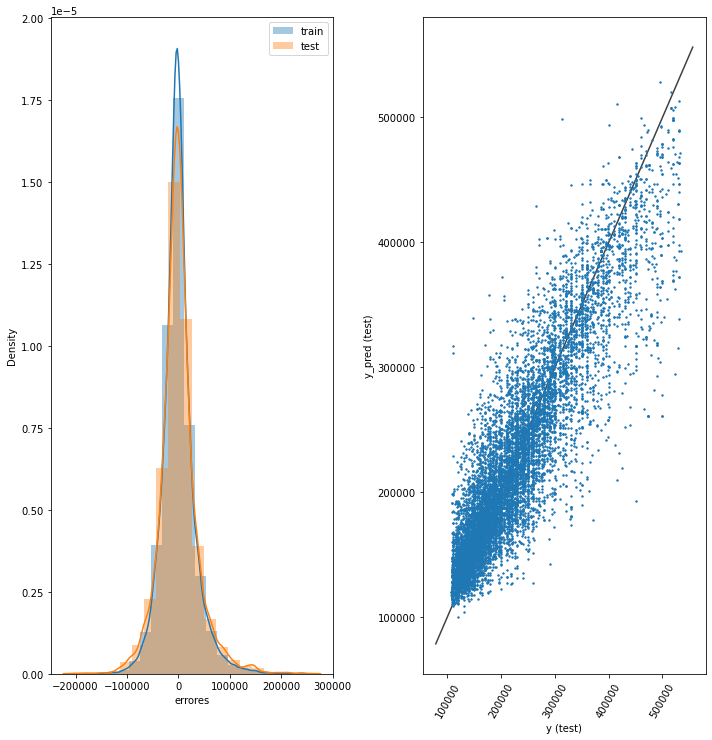

In [97]:
y_train_pred_xgb = XGB.predict(X_train)
y_test_pred_xgb = XGB.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("RMSE en Train es:",rmse_train_xgb)
print("RMSE en Test es:",rmse_test_xgb)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_xgb, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_xgb, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_xgb, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

##### XGBost optimizado (RandomSearch y GridSearch)

In [99]:
XGBoost = XGBRegressor()
params_XGBoost = {'max_depth': range (11,15,1),'n_estimators': range(170, 220, 10),'learning_rate': [0.1, 0.01],'eval_metric':['rmse'],'random_state':[42]}

In [100]:
'''Se decide trabajar con Random Search por la velocidad de optimización'''

# from sklearn.model_selection import RandomizedSearchCV

# model_XGB = RandomizedSearchCV(XGBoost, param_distributions = params_XGBoost, cv=3, n_jobs=-1)
# model_XGB.fit(X_train,y_train)

'''Gracias al GridSearch pudimos encontrar la zona donde se encuentra la mejor optimizacion del modelo y con esos resultados acotar el rango de los hiperparametros
   y por ende el tiempo de procesamiento del GridSearch'''

from sklearn.model_selection import GridSearchCV

model_XGB = GridSearchCV(XGBoost,param_grid=params_XGBoost, cv=4,n_jobs=-1)
model_XGB.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [101]:
print("Mejores parametros: "+str(model_XGB.best_params_))
print("Mejor Score: "+str(model_XGB.best_score_)+'\n')

scores = pd.DataFrame(model_XGB.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 210, 'random_state': 42}
Mejor Score: 0.8574985645276305



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eval_metric,param_learning_rate,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,26.491834,0.352985,0.035405,0.008179,rmse,0.1,12,210,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.858981,0.857385,0.853699,0.859930,0.857499,0.002375,1
8,24.818328,0.256332,0.039145,0.013238,rmse,0.1,12,200,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.858709,0.856825,0.853129,0.859540,0.857051,0.002469,2
19,33.451503,0.550651,0.048869,0.018131,rmse,0.1,14,210,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.857288,0.858321,0.852485,0.859777,0.856968,0.002735,3
18,31.795687,0.492691,0.050366,0.012346,rmse,0.1,14,200,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.857187,0.858218,0.852321,0.859509,0.856809,0.002719,4
17,30.503130,0.454380,0.046131,0.021908,rmse,0.1,14,190,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.857117,0.857979,0.852246,0.859233,0.856644,0.002648,5
7,25.661181,0.343279,0.040891,0.006148,rmse,0.1,12,190,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.858533,0.856251,0.852671,0.859117,0.856643,0.002531,6
14,29.827247,0.222775,0.035406,0.005921,rmse,0.1,13,210,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.857608,0.859237,0.851369,0.857977,0.856548,0.003050,7
16,28.907901,0.315390,0.047890,0.007589,rmse,0.1,14,180,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.857039,0.857766,0.852161,0.858726,0.856423,0.002532,8
4,27.001867,0.714372,0.055851,0.021309,rmse,0.1,11,210,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.858293,0.856725,0.852918,0.857277,0.856303,0.002034,9
13,32.053051,0.203173,0.038896,0.009898,rmse,0.1,13,200,42,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.857518,0.859055,0.850930,0.857628,0.856283,0.003149,10


In [102]:
model_XGB.predict(X_test)

array([227830.45, 154525.11, 209306.58, ..., 437934.34, 171467.42,
       220122.4 ], dtype=float32)

In [103]:
model_XGB.score(X_test,y_test)

0.8770910134395642

In [104]:
y_train_pred_XGB = model_XGB.predict(X_train)
y_test_pred_XGB = model_XGB.predict(X_test)

RMSE en Train es: 13346.192344536636
RMSE en Test es: 30335.09805581421


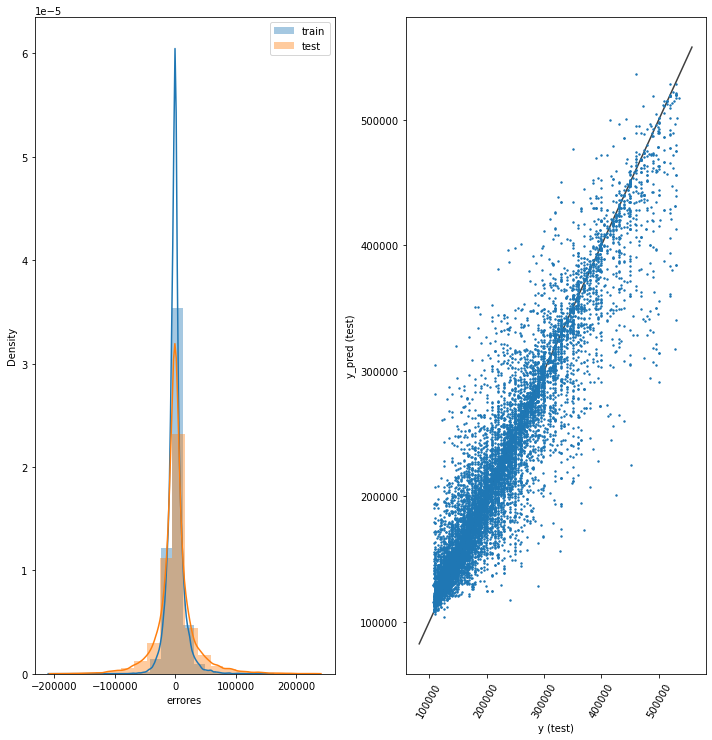

In [105]:
rmse_train_XGB = np.sqrt(mean_squared_error(y_train, y_train_pred_XGB))
rmse_test_XGB = np.sqrt(mean_squared_error(y_test, y_test_pred_XGB))

print("RMSE en Train es:",rmse_train_XGB)
print("RMSE en Test es:",rmse_test_XGB)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_XGB, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_XGB, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_XGB, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

##### Validación Cruzada - XGboost optimizado

In [106]:
XGB = XGBRegressor(eval_metric = 'rmse',learning_rate = 0.1, max_depth = 12, n_estimators = 210, random_state = 42)

XGB_scores = np.sqrt(abs(cross_val_score(XGB, X_rf, y_rf,scoring = 'neg_mean_squared_error', cv=4)))

In [107]:
print(XGB_scores.mean())
print("RMSE para XGBboost: %0.2f (+/- %0.2f)" % (XGB_scores.mean(), XGB_scores.std() * 2))

36635.6277796273
RMSE para XGBboost: 36635.63 (+/- 10623.70)


Como ocurrio con el modelo de Random Forest, el modelo esta sobreajustando los datos, por lo que bajamos la complejidad del modelo y tratamos de corregir la varianza

In [108]:
import xgboost as xgb
from xgboost import XGBRegressor

XGB = XGBRegressor(eval_metric = 'rmse',learning_rate = 0.1, max_depth = 9, n_estimators = 200, random_state = 42)
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

RMSE en Train es: 23312.653254921493
RMSE en Test es: 32794.69211943263


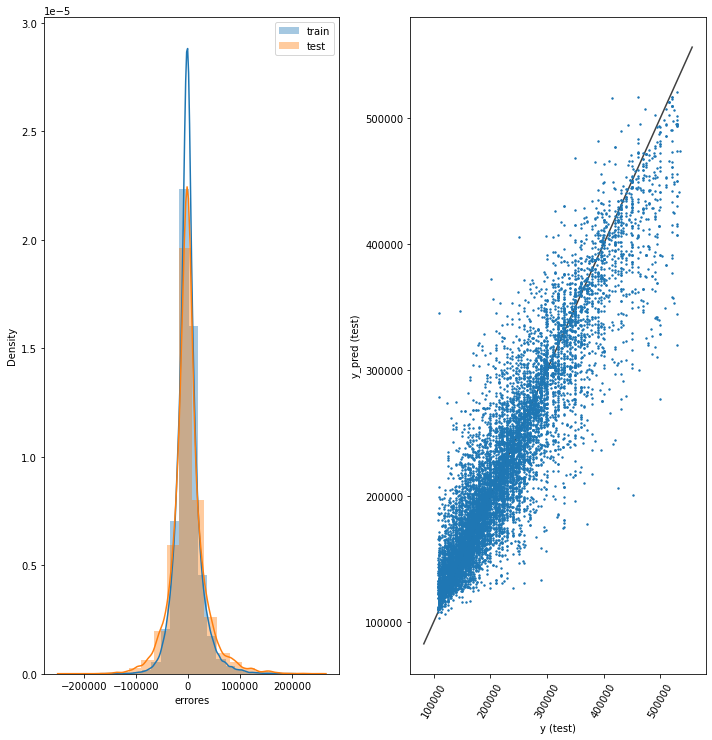

In [109]:
y_train_pred_xgb = XGB.predict(X_train)
y_test_pred_xgb = XGB.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("RMSE en Train es:",rmse_train_xgb)
print("RMSE en Test es:",rmse_test_xgb)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_xgb, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_xgb, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_xgb, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

Como podemos observar el modelos de Xgboost es el que obtuvo mejor desempeño al momemnto de predecir, por lo que considero que seria el mejor modelo para llevar a cabo la tarea de predecir el valor de una vivienda.

### Modelo 1er Proyecto

In [110]:
properati = pd.read_csv("DSp2.csv")

In [111]:
df1 = properati[(properati.l2 =='Capital Federal') & (properati.property_type == 'Departamento')]
df2 = properati[(properati.l2 =='Capital Federal') & (properati.property_type == 'PH')]
df3 = properati[(properati.l2 =='Capital Federal') & (properati.property_type == 'Casa')]

data1 = pd.concat([df1, df2,df3])

In [112]:
filtrado = data1[(data1.surface_total <= 1000) & (data1.surface_total >= 15) & (data1.price <= 4000000)]

df_f= filtrado[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']]

df_filtrado = df_f.dropna()
df_filtrado.shape

(81019, 7)

In [113]:
X = df_filtrado [['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = df_filtrado['price']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 197944.78077547756
Raíz del error cuadrático medio en Test: 205115.29240386625


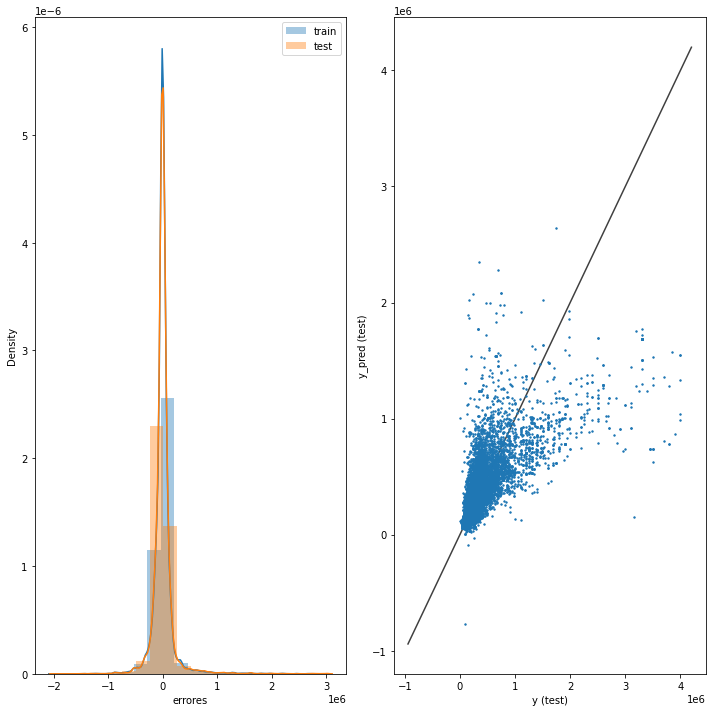

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 177230.00114061098
Raíz del error cuadrático medio en Test: 184084.46420003098


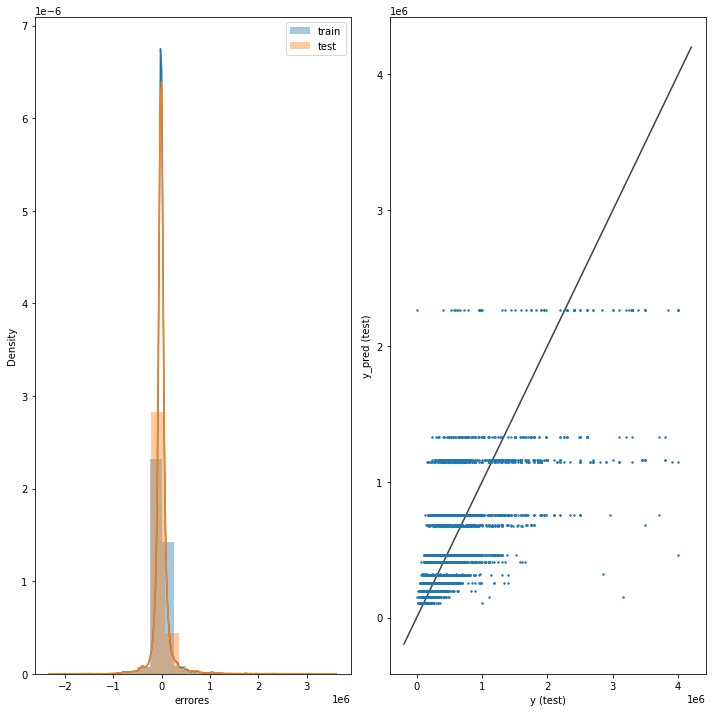

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 157365.06178792828
Raíz del error cuadrático medio en Test: 168255.0453137338


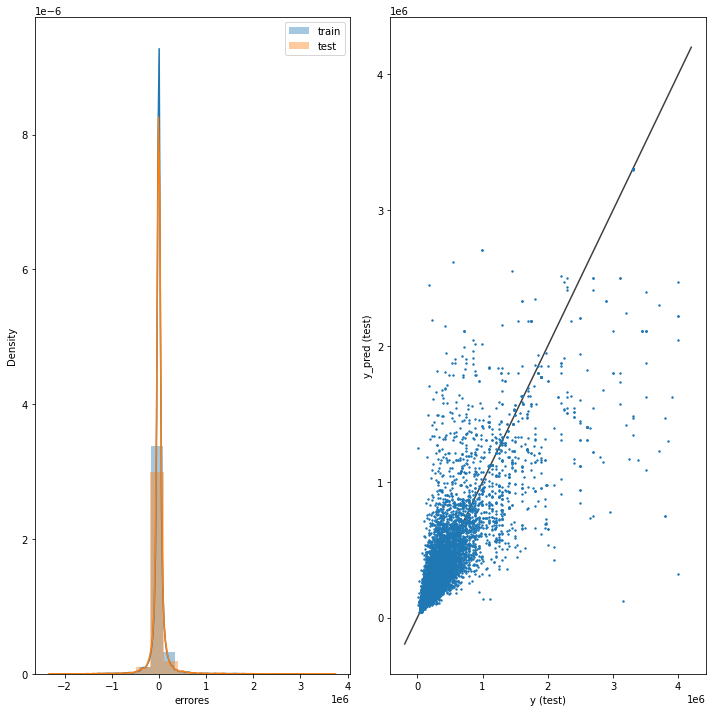

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=4,random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20)

linear_model.fit(X_train, y_train);
tree_regressor.fit(X_train, y_train);
knn_regressor.fit(X_train, y_train);

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Parte C:

1. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

2. ¿Dónde es mayor el error? ¿dónde acierta?

1.

In [59]:
X = data[["city","lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","property_type_Casa","property_type_Departamento","property_type_PH"]]
y = data['price']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 130, min_samples_split = 2, min_samples_leaf = 2, max_samples = None, max_features = 'auto', max_depth = 12, criterion = 'mse', random_state = 42)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=130,
                      random_state=42)

In [62]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

Importancia de cada atributo en la predicción para el modelo de Random Forest:

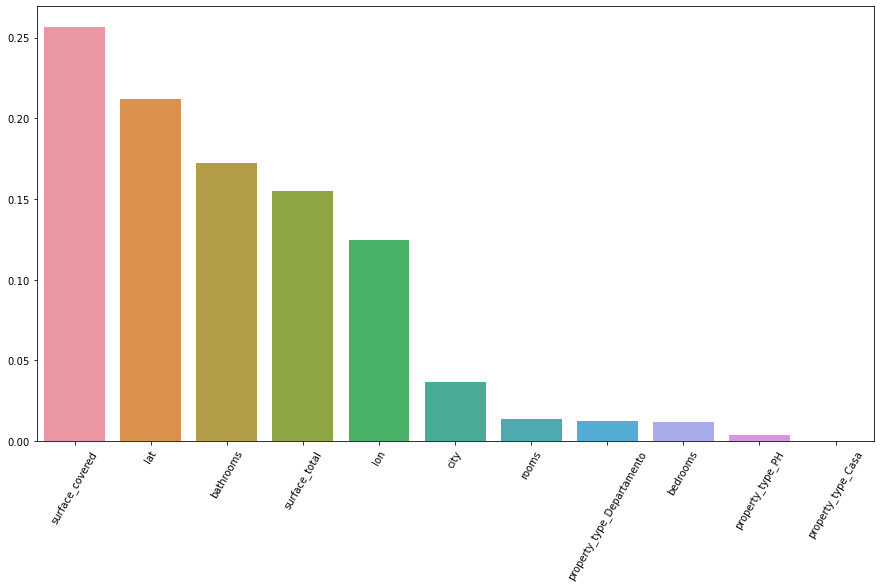

In [63]:
importances = forest.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

Tomamos 6 árboles al azar para el modelo de Random Forest

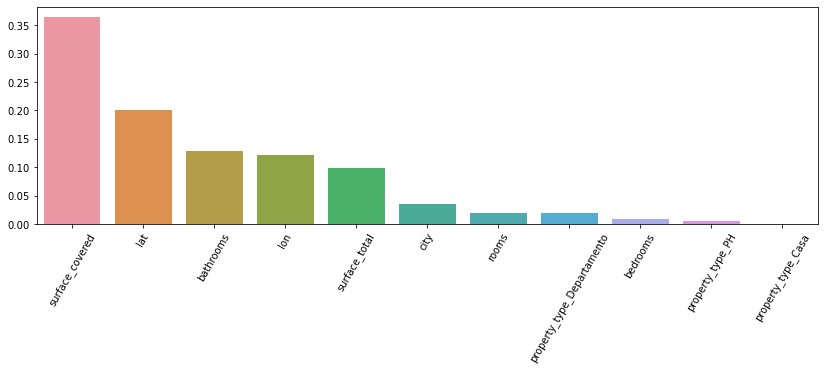

In [64]:
# Importancia de los atributos para el primer arbol
importances = forest.estimators_[0].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (14,4))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

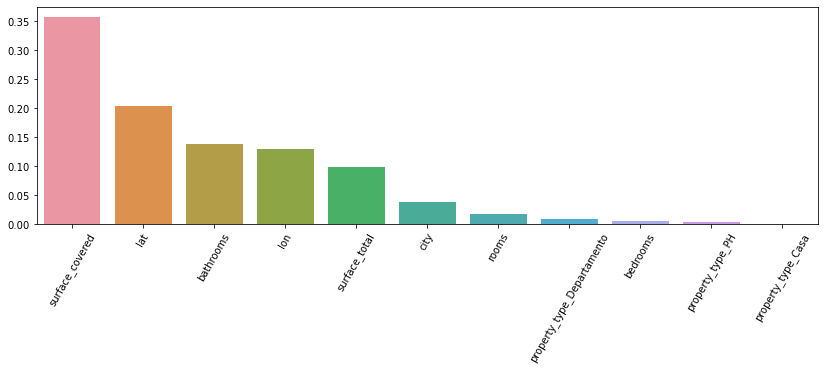

In [65]:
# Importancia de los atributos para el arbol número 9
importances = forest.estimators_[10].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (14,4))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

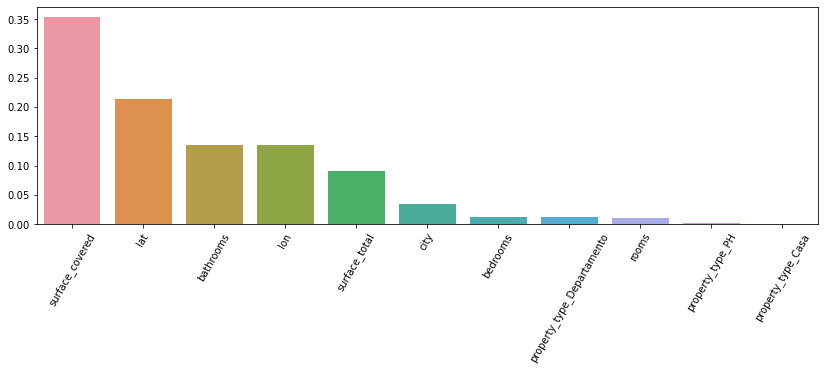

In [66]:
# Importancia de los atributos para el arbol número 49
importances = forest.estimators_[50].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (14,4))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

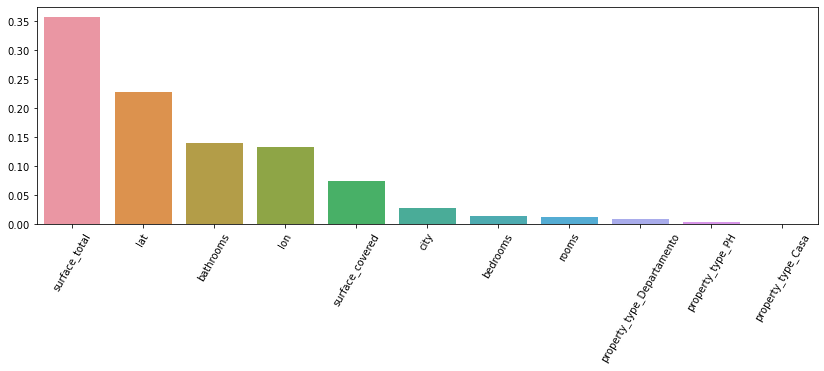

In [67]:
# Importancia de los atributos para el arbol número 99
importances = forest.estimators_[100].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (14,4))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

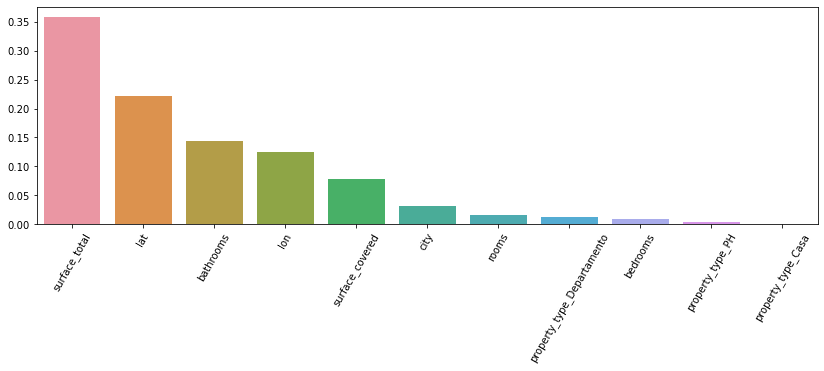

In [68]:
# Importancia de los atributos para el arbol número 119
importances = forest.estimators_[120].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (14,4))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

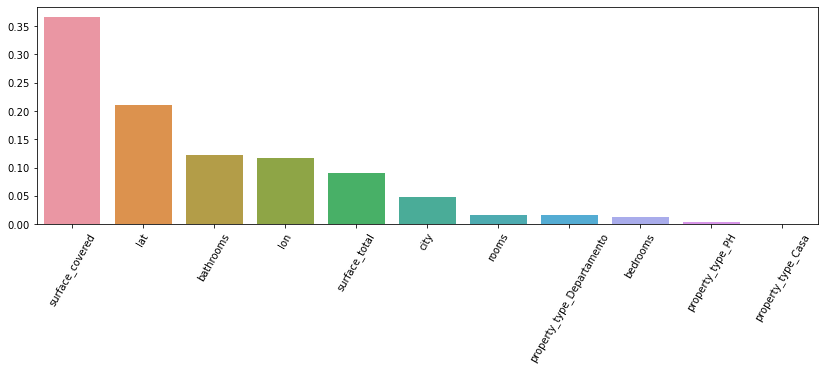

In [69]:
# Importancia de los atributos para el arbol número 128
importances = forest.estimators_[129].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (14,4))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=60);
plt.show()

Como podemos observar en los 6 gráficos superiores, los cuales pertenecen a árboles tomados de forma aleatoria del Random-Forest, los distintos árboles consideran los mismos atributos importantes al momento de llevar a cabo las predicciones. Estos atributos son: las superficies, la latitud y la longitud y la cantidad de baños.

2. Usamos los modelos con mejores puntajes obtenidos en el punto B.

Vemos donde tiene mayor error el modelo de random forest

In [70]:
data_error = data.copy()

X1 = data_error[["city","lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","property_type_Casa","property_type_Departamento","property_type_PH"]]
y1 = data_error['price']

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 130, min_samples_split = 2, min_samples_leaf = 2, max_samples = None, max_features = 'auto', max_depth = 12, criterion = 'mse', random_state = 42)
forest.fit(X1,y1)

y_pred = forest.predict(X1)

In [71]:
data_error['Tipo_de_propiedad'] = tipo
data_error['precio_predicho'] = y_pred
data_error['error'] = abs(y1 - y_pred)
data_error.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,Tipo_de_propiedad,precio_predicho,error
1,419,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0,Departamento,152960.970516,3960.970516
7,1392,-34.636661,-58.471170,Capital Federal,2.0,1.0,1.0,58.0,48.0,154000.0,0,1,0,Departamento,133089.608333,20910.391667
8,1392,-34.633914,-58.470013,Capital Federal,2.0,1.0,1.0,50.0,48.0,132000.0,0,1,0,Departamento,128557.204967,3442.795033
16,7553,-34.590031,-58.423771,Capital Federal,2.0,1.0,1.0,52.0,48.0,188000.0,0,1,0,Departamento,182441.250243,5558.749757
17,7553,-34.585304,-58.422915,Capital Federal,2.0,1.0,2.0,81.0,76.0,410000.0,0,1,0,Departamento,334474.501069,75525.498931


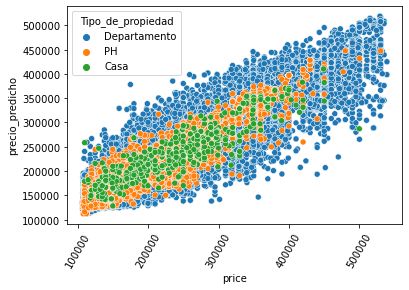

In [72]:
sns.scatterplot(x = "price", y = "precio_predicho", hue = 'Tipo_de_propiedad' , data = data_error);
plt.xticks(rotation=60);
plt.show()

Vemos donde tiene mayor error el modelo de XGBoost

In [73]:
data_error_xgb = data.copy()

In [74]:
X1 = data_error_xgb[["city","lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","property_type_Casa","property_type_Departamento","property_type_PH"]]
y1 = data_error_xgb['price']

import xgboost as xgb
from xgboost import XGBRegressor

XGB = XGBRegressor(eval_metric = 'rmse',learning_rate = 0.1, max_depth = 9, n_estimators = 200, random_state = 42)
XGB.fit(X1, y1)

XGB.fit(X1,y1)

y_pred = XGB.predict(X1)

In [75]:
data_error_xgb['Tipo_de_propiedad'] = tipo
data_error_xgb['precio_predicho'] = y_pred
data_error_xgb['error'] = abs(y1 - y_pred)
data_error_xgb.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,Tipo_de_propiedad,precio_predicho,error
1,419,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0,Departamento,166083.546875,17083.546875
7,1392,-34.636661,-58.471170,Capital Federal,2.0,1.0,1.0,58.0,48.0,154000.0,0,1,0,Departamento,129681.593750,24318.406250
8,1392,-34.633914,-58.470013,Capital Federal,2.0,1.0,1.0,50.0,48.0,132000.0,0,1,0,Departamento,122412.109375,9587.890625
16,7553,-34.590031,-58.423771,Capital Federal,2.0,1.0,1.0,52.0,48.0,188000.0,0,1,0,Departamento,184952.000000,3048.000000
17,7553,-34.585304,-58.422915,Capital Federal,2.0,1.0,2.0,81.0,76.0,410000.0,0,1,0,Departamento,365705.281250,44294.718750


In [76]:
ddata_error_xgb = data_error_xgb[(data_error_xgb.precio_predicho <=200000)]
ddata_error_xgb.head()

,city,lat,lon,district,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,Tipo_de_propiedad,precio_predicho,error
1,419,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0,Departamento,166083.546875,17083.546875
7,1392,-34.636661,-58.471170,Capital Federal,2.0,1.0,1.0,58.0,48.0,154000.0,0,1,0,Departamento,129681.593750,24318.406250
8,1392,-34.633914,-58.470013,Capital Federal,2.0,1.0,1.0,50.0,48.0,132000.0,0,1,0,Departamento,122412.109375,9587.890625
16,7553,-34.590031,-58.423771,Capital Federal,2.0,1.0,1.0,52.0,48.0,188000.0,0,1,0,Departamento,184952.000000,3048.000000
23,7553,-34.576254,-58.438893,Capital Federal,2.0,1.0,1.0,50.0,47.0,142000.0,0,1,0,Departamento,149644.906250,7644.906250


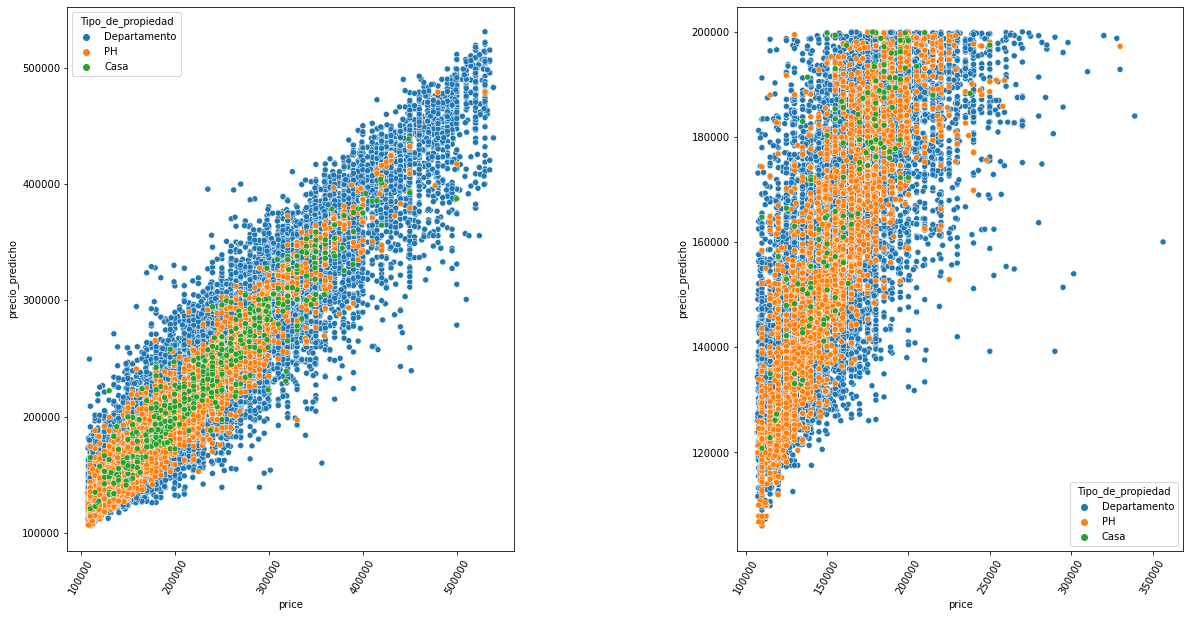

In [77]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(wspace = 0.5,hspace = 0.5)

plt.subplot(1,2,1)
sns.scatterplot(x = "price", y = "precio_predicho", hue = 'Tipo_de_propiedad' , data = data_error_xgb);
plt.xticks(rotation=60);

plt.subplot(1,2,2)
sns.scatterplot(x = "price", y = "precio_predicho", hue = 'Tipo_de_propiedad' , data = ddata_error_xgb);
plt.xticks(rotation=60);


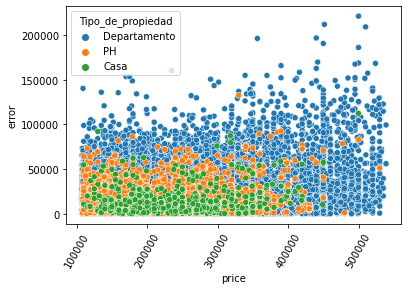

In [79]:
sns.scatterplot(x = "price", y = "error", hue = 'Tipo_de_propiedad' , data = data_error_xgb);
plt.xticks(rotation=60);

En cuanto a los errores podemos observar que el modelo de XGBoost es mas eficiente que el Random-Forest, debido a que el primero mencionado posee una menor destribución de los valores predichos vs los valores reales de las propiedades (se asemeja más a una recta). 
Por otro lado, támbien podemos observar que los modelos son menos precisos al momento de predecir los precios de los departamentos debido a que en los diagramas de distribución tanto las casas como los PH son mas parecidos a una recta mientras que en los departamentros por arriba de los 140000 dolares los datos se dispersan de mucho más que para las otras propiedades. 

### Conclusiones:

Como podemos observar a lo largo de este proyecto, se obtuvieron grandes mejorías en cuanto al desempeño de los modelos, tanto de los básicos, como los modelos avanzados. Esto es gracias a una óptima Exploración de los Datos y una correcta manipulación del Dataset. 
En la primer parte del proyecto se realizó Árbol de decisión con las mismas condiciones que el proyecto anterior. La única diferencia fue que para este modelo se tuvieron en cuenta más atributos y se le realizo un mejor filtrado al dataset de entrenamiento, haciendo que se obtenga una mejoría del orden del 70% al momento de llevar a cabo la predicción.

Por otro lado, para mejorar aún más los resultados obtenidos con los modelos básicos, se procedió a desarrollar modelos avanzados como Random Forest y XGBoost, los cuales sin optimizar sus hiperparámetros obtuvieron buenos desempeños, pero al momento de realizar su optimización se eligió trabajar con el Random Search y el Grid Search en conjunto. Asi se encontró la zona de mejor desempeño de una forma más rápida y eficiente. 
La metodología que se adoptó fue iterar varias veces el modelo agregando y quitando hiperparamentros, a su vez variarle sus argumentos para así conocer cuáles de los hiperparametros poseian mayor peso al momento de llevar a cabo la predicción. 
Una vez elegido los hiperparamentros a modificar, se realizó un GridSearch, el cual es rápido de realizar y procesar. Asi ejecuntadolo un par de veces y viendo los puntajes obtenidos se fueron acontando los argumentos a valores donde se encontraban los mejores puntajes y luego realizar un GridSearch de la zona por la cual se encontraban los mejores puntajes, al haber realizado el RandomSearch en primer lugar se optimizaron en gran medida los tiempos de procesamiento del GridSeach. 

Un análisis sobre estos valores, y sobre todo en train, nos permite determinar que estamos ante un caso de sesgo bajo, pero al momento de ver el RMSE de test, aquí se ve que los modelos avanzados que se entrenaron sufren de varianza. Una solución simple fue disminuirle la complejidad es estos, esto a costa de aumentar el sesgo del modelo, pero luego de hacer ello nos encontramos ante un sistema más balanceado entre Train y Test.

En cuanto a los resultados obtenidos, se puede decir que se obtuvo un gran desempeño en ambos modelos avanzados, aunque como se esperaba, el XGBoost obtuvo menor error al predecir. Por lo que elijo ese modelo como el mejor para predecir el valor de una vivienda. Además, obtuvo buenos puntajes en la validación cruzada, afirmando que el modelo funciona correctamente independientemente de la partición que se le realicen los datos.

Como se suponía, desde un principio del trabajo, una de las variables más importantes al momento de la predicción fue la de Latitud y Longitud. Las propiedades varían mucho el valor por ubicación, aunque todos los atributos que se encuentran en la variable X son en mayor o menor medida cruciales para la predicción, ya que al momento de predecir el valor de una propiedad son varios factores los que se deben tener en cuenta.

Como conclusión podemos afirmar que se logró cumplir con el trabajo del proyecto. Quedando muy conforme con los resultados obtenidos. No obstante, lo que modificaría sería la manera de obtención de los datos de los tasadores, ya que el Datset poseía una gran cantidad de valores faltantes o datos que no eran correctos. Es por ello que se aplicó filtro y así se eliminaron columnas que si hubiesen tenido valores precisos hubieran servido para entrenar los modelos. Otro punto cual modificaría sería el de agregar mayor cantidad de atributos útiles al momento de predecir y hacen al valor de una propiedad como por ejemplo si posee terraza, pileta, cercanía a escuelas entre otras cosas.